In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [2]:
df_train = pd.read_csv("/Users/clifflau/Library/CloudStorage/OneDrive-UniversityofLeeds/University of Leeds/MATH5872M Dissertation/Data Preparation/df_training.csv")
df_train = df_train.drop(df_train[(df_train.vis_reforecast_obs>100000) | (df_train.vis_reforecast>100000)].index)
print("Original dimension:")
print(df_train.shape)
#df_train = df_train.sample(frac=0.05)
df_train = df_train.reset_index()
print("Sample dimension:")
print(df_train.shape)

Original dimension:
(7657964, 10)
Sample dimension:
(7657964, 11)


In [3]:
df_train

,index,Unnamed: 0,base,lead,lead_hr,station_lat,station_lon,station_alt,t_reforecast,vis_reforecast,vis_reforecast_obs
0,0,0,1997-01-02,0 days,0,52.928000,4.781000,1.2,264.69553,9035.877,12000.0
1,1,1,1997-01-05,0 days,0,52.928000,4.781000,1.2,270.30603,18376.275,25000.0
2,2,2,1997-01-09,0 days,0,52.928000,4.781000,1.2,272.64844,18909.020,4000.0
3,3,3,1997-01-12,0 days,0,52.928000,4.781000,1.2,274.97598,21590.420,3500.0
4,4,4,1997-01-16,0 days,0,52.928000,4.781000,1.2,280.20123,20659.674,3900.0
...,...,...,...,...,...,...,...,...,...,...,...
7657959,10358035,10358035,2017-12-17,5 days,120,45.786833,3.149333,331.0,274.54236,4150.832,4862.0
7657960,10358036,10358036,2017-12-20,5 days,120,45.786833,3.149333,331.0,279.22650,23566.400,628.0
7657961,10358037,10358037,2017-12-24,5 days,120,45.786833,3.149333,331.0,268.36307,42204.875,30056.0
7657962,10358038,10358038,2017-12-27,5 days,120,45.786833,3.149333,331.0,277.68503,37050.960,60000.0


In [3]:
df_valid = pd.read_csv("/Users/clifflau/Library/CloudStorage/OneDrive-UniversityofLeeds/University of Leeds/MATH5872M Dissertation/Data Preparation/df_valid.csv")
df_valid = df_valid.drop(df_valid[(df_valid.vis_forecast_obs>100000) | (df_valid.vis_forecast>100000)].index)
print("Original dimension:")
print(df_valid.shape)
#df_test = df_valid.sample(frac=0.015)
df_valid = df_valid.reset_index()
print("Sample dimension:")
print(df_valid.shape)

Original dimension:
(683512, 10)
Sample dimension:
(683512, 11)


In [4]:
df_test = pd.read_csv("/Users/clifflau/Library/CloudStorage/OneDrive-UniversityofLeeds/University of Leeds/MATH5872M Dissertation/Data Preparation/df_test.csv")
df_test = df_test.drop(df_test[(df_test.vis_forecast_obs>100000) | (df_test.vis_forecast>100000)].index)
print("Original dimension:")
print(df_test.shape)
#df_test = df_test.sample(frac=0.015)
df_test = df_test.reset_index()
print("Sample dimension:")
print(df_test.shape)

Original dimension:
(679514, 10)
Sample dimension:
(679514, 11)


In [5]:
len(set(df_train['lead_hr'])), len(set(df_valid['lead_hr'])), len(set(df_test['lead_hr']))

(21, 21, 21)

In [6]:
x_train = df_train[['station_alt', 't_reforecast', 'vis_reforecast']]
x_train

,station_alt,t_reforecast,vis_reforecast
0,1.2,264.69553,9035.877
1,1.2,270.30603,18376.275
2,1.2,272.64844,18909.020
3,1.2,274.97598,21590.420
4,1.2,280.20123,20659.674
...,...,...,...
7657959,331.0,274.54236,4150.832
7657960,331.0,279.22650,23566.400
7657961,331.0,268.36307,42204.875
7657962,331.0,277.68503,37050.960


In [7]:
y_train = df_train['vis_reforecast_obs']
y_train

0          12000.0
1          25000.0
2           4000.0
3           3500.0
4           3900.0
            ...   
7657959     4862.0
7657960      628.0
7657961    30056.0
7657962    60000.0
7657963    43434.0
Name: vis_reforecast_obs, Length: 7657964, dtype: float64

In [8]:
x_valid = df_valid[['station_alt', 't_forecast', 'vis_forecast']]
x_valid = x_valid.rename(columns={'t_forecast': 't_reforecast', 'vis_forecast': 'vis_reforecast'})
x_valid

,station_alt,t_reforecast,vis_reforecast
0,1.2,272.33716,21243.568
1,1.2,268.47940,22479.310
2,1.2,268.28348,20113.713
3,1.2,271.48856,16410.387
4,1.2,267.00677,20657.412
...,...,...,...
683507,331.0,276.95453,39495.140
683508,331.0,271.89932,23193.568
683509,331.0,277.64316,24519.666
683510,331.0,272.76944,33135.473


In [9]:
y_valid = df_valid[['vis_forecast_obs']]
y_valid = y_valid.rename(columns={'vis_forecast_obs': 'vis_reforecast_obs'})
y_valid

,vis_reforecast_obs
0,4500.0
1,20000.0
2,25000.0
3,11000.0
4,20000.0
...,...
683507,60000.0
683508,59895.0
683509,60000.0
683510,59260.0


In [ ]:
import time

st = time.time()

rf = RandomForestRegressor(n_estimators=20, max_depth=20, random_state=18)
rf.fit(x_train, y_train)

et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

In [10]:
# Saving and loading model
import pickle

#with open('rf_nestimators20_maxdepth20.pkl','wb') as f:
    #pickle.dump(rf,f)

with open('rf_nestimators30_maxdepth20.pkl', 'rb') as f:
    rf = pickle.load(f)

In [11]:
y_pred_valid_rf = rf.predict(x_valid)
valid_error_rf = np.array(y_valid['vis_reforecast_obs'])-y_pred_valid_rf

df_result_valid = df_valid
df_result_valid['error_rf'] = valid_error_rf

df_result_valid

,index,Unnamed: 0,base,lead,lead_hr,station_lat,station_lon,station_alt,t_forecast,vis_forecast,vis_forecast_obs,error_rf
0,0,0,2017-01-01,0 days,0,52.928000,4.781000,1.2,272.33716,21243.568,4500.0,-6560.900152
1,1,1,2017-01-02,0 days,0,52.928000,4.781000,1.2,268.47940,22479.310,20000.0,6076.026230
2,2,2,2017-01-03,0 days,0,52.928000,4.781000,1.2,268.28348,20113.713,25000.0,9656.029668
3,3,3,2017-01-04,0 days,0,52.928000,4.781000,1.2,271.48856,16410.387,11000.0,-3537.818957
4,4,4,2017-01-05,0 days,0,52.928000,4.781000,1.2,267.00677,20657.412,20000.0,5389.502731
...,...,...,...,...,...,...,...,...,...,...,...,...
683507,904465,1808570,2017-12-27,5 days,120,45.786833,3.149333,331.0,276.95453,39495.140,60000.0,34557.682611
683508,904466,1808571,2017-12-28,5 days,120,45.786833,3.149333,331.0,271.89932,23193.568,59895.0,40671.940977
683509,904467,1808572,2017-12-29,5 days,120,45.786833,3.149333,331.0,277.64316,24519.666,60000.0,38271.266565
683510,904468,1808573,2017-12-30,5 days,120,45.786833,3.149333,331.0,272.76944,33135.473,59260.0,37735.447123


In [12]:
import xarray as xr
vis_forecast_obs = xr.open_dataarray("/Users/clifflau/Desktop/Data/vis_forecast_observations.nc")
lead = np.array(vis_forecast_obs['forecast_period'])
lead_hr = np.array(lead*10**-9/3600, dtype='int')

rmse_pred_valid_rf = []
mae_pred_valid_rf = []
rmse_forecast = []
mae_forecast = []

for l in lead_hr:
    df_result_lead = df_result_valid[df_result_valid['lead_hr']==l]
    rmse_pred_valid_rf.append(np.sqrt(np.mean(df_result_lead['error_rf']**2)))
    rmse_forecast.append(np.sqrt(np.mean((df_result_lead['vis_forecast_obs']-df_result_lead['vis_forecast'])**2)))
    mae_pred_valid_rf.append(np.mean(np.abs(df_result_lead['error_rf'])))
    mae_forecast.append(np.mean(np.abs(df_result_lead['vis_forecast_obs']-df_result_lead['vis_forecast'])))

rmse_pred_valid_rf = np.array(rmse_pred_valid_rf)/1000
rmse_forecast = np.array(rmse_forecast)/1000
mae_pred_valid_rf = np.array(mae_pred_valid_rf)/1000
mae_forecast = np.array(mae_forecast)/1000

/Users/clifflau/opt/anaconda3/lib/python3.8/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.30.0
  warnings.warn(


Text(0.5, 1.0, 'Validation RMSE of Original and Post-Processed Visibility Forecasts for different Lead Times \n(Forecasts in 2017)')

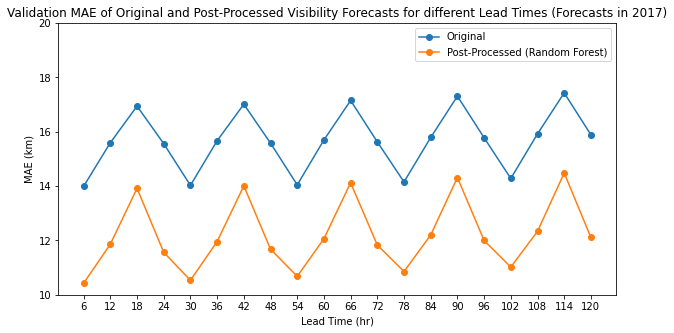

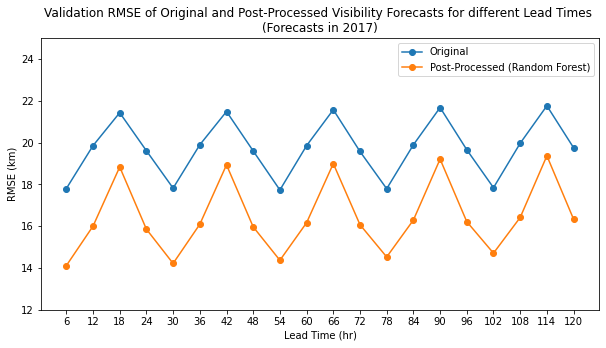

In [13]:
plt.figure(figsize=(10,5))
plt.plot(lead_hr[1:], mae_forecast[1:], 'o-', label='Original')
plt.plot(lead_hr[1:], mae_pred_valid_rf[1:], 'o-', label='Post-Processed (Random Forest)')
plt.ylim(10,20)
plt.xticks(lead_hr[1:])
plt.xlabel("Lead Time (hr)")
plt.ylabel("MAE (km)")
plt.legend()
plt.title("Validation MAE of Original and Post-Processed Visibility Forecasts for different Lead Times (Forecasts in 2017)")

plt.figure(figsize=(10,5))
plt.plot(lead_hr[1:], rmse_forecast[1:], 'o-', label='Original')
plt.plot(lead_hr[1:], rmse_pred_valid_rf[1:], 'o-', label='Post-Processed (Random Forest)')
plt.ylim(12,25)
plt.xticks(lead_hr[1:])
plt.xlabel("Lead Time (hr)")
plt.ylabel("RMSE (km)")
plt.legend()
plt.title("Validation RMSE of Original and Post-Processed Visibility Forecasts for different Lead Times \n(Forecasts in 2017)")